In [1]:
from tspqaoa import optimization, qls, utils
import networkx as nx
import numpy as np
import random
from qiskit.visualization import plot_histogram
from tspqaoa.optimization import get_optimized_angles, run_qaoa
from tspqaoa.qaoa import get_tsp_qaoa_circuit
from tspqaoa.utils import format_from_onehot, unformat_to_onehot
from qiskit.providers.aer import AerSimulator

{(0, 1): Text(-0.32733655332186173, 0.082709141790176, '0.48292676812279456'),
 (0, 2): Text(-0.24217289230830116, 0.40902835378597735, '0.4459973298077765'),
 (0, 3): Text(0.29774774550572025, -0.21843150375319711, '0.8444357025660336'),
 (0, 4): Text(0.07057981121986429, 0.08852346455652157, '0.8933955236362473'),
 (0, 5): Text(0.2422666100610816, 0.27891314350249485, '0.32612733647748116'),
 (0, 6): Text(0.044084284474226076, -0.5302469210328552, '0.3426115197069102'),
 (0, 7): Text(0.06708943176681745, -0.18607035122311516, '0.7927357757074501'),
 (0, 8): Text(-0.3314529755995276, -0.44833203756485973, '0.9103108265783382'),
 (0, 9): Text(-0.5970277911717115, -0.10763003001578489, '0.7467388227613156'),
 (1, 2): Text(-0.37545386328673996, 0.6496216805648141, '0.6702610382523595'),
 (1, 3): Text(0.16446677452728142, 0.02216182302563957, '0.11713977035474543'),
 (1, 4): Text(-0.06270115975857452, 0.32911679133535826, '0.6001067080185455'),
 (1, 5): Text(0.1089856390826428, 0.51950647

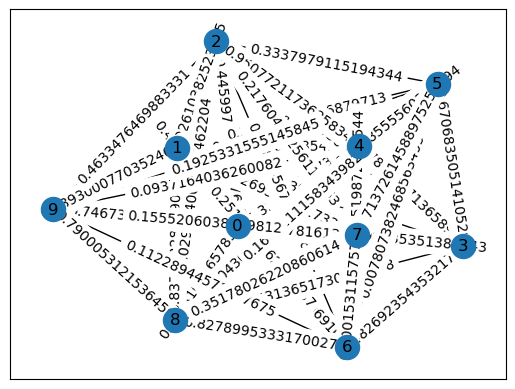

In [2]:
G = nx.complete_graph(10)
for (u,v,w) in G.edges(data=True):
    w['weight'] = random.random()

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [3]:
state_gpu = qls.qls_main_subroutine(G, [0,1,2,3,4,5,6,7,8,9], [2,3,4],device="GPU")

init state:  [1, 2, 3, 4, 5]
path pieces: [[5, 6, 7, 8, 9, 0, 1]]
updated qls state:  [3, 4, 1, 2, 5]
updated global state:  [3, 4, 1, 2, 5]


In [4]:
state_cpu = qls.qls_main_subroutine(G, [0,1,2,3,4,5,6,7,8,9], [2,3,4],device="CPU")

init state:  [1, 2, 3, 4, 5]
path pieces: [[5, 6, 7, 8, 9, 0, 1]]
updated qls state:  [3, 4, 1, 2, 5]
updated global state:  [3, 4, 1, 2, 5]


In [5]:
benchmark_state = qls.benchmark_main_subroutine(G, [0,1,2,3,4,5,6,7,8,9], [2,3,4])

init state:  [1, 2, 3, 4, 5]
path pieces: [[5, 6, 7, 8, 9, 0, 1]]
updated qls state:  [1, 5, 2, 3, 4]
updated global state:  [1, 0, 9, 8, 7, 6, 5, 2, 3, 4]
